In [1]:
import tensorflow as tf
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_path = '/content/gdrive/MyDrive/TrainingSet'
test_path = '/content/gdrive/MyDrive/TestingSet'

In [4]:
batch_size = 32
img_height = img_width = 100

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 275 files belonging to 4 classes.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 120 files belonging to 4 classes.


In [7]:
train_ds.prefetch(1)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['Abdul', 'Alisha', 'Bhamini', 'Dhanvi']


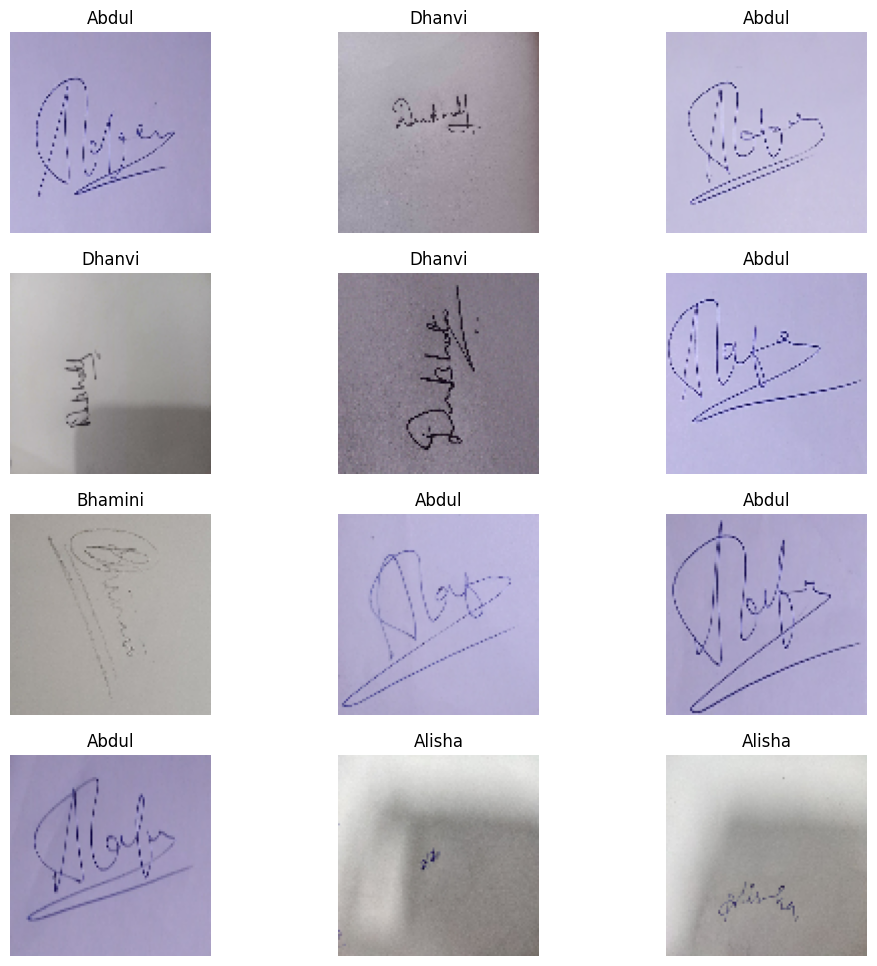

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for img, label in val_ds.take(1):
      for i in range(12):
            ax = plt.subplot(4,3,i+1)
            plt.imshow(img[i].numpy().astype("uint8"))
            plt.title(class_names[label[i]])
            plt.axis("off")

In [10]:
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
zoom_layer = tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.1, 0.3))
rot_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2)


In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential


In [12]:
def get_model(num_classes):
    model = Sequential([norm_layer,
                        zoom_layer,
                       rot_layer,
                      Conv2D(16, (5, 5), padding='same', activation='relu'),
                       MaxPooling2D((2,2)),
                       BatchNormalization(),
                       Dropout(0.3),
                       Conv2D(16, (3, 3), padding='same', activation='relu'),
                       MaxPooling2D((2,2), strides=(2,2)),
                       Dropout(0.3),
                       Flatten(),
                       Dense(256, activation='relu'),
                       Dropout(0.5),
                       Dense(num_classes, activation='softmax')
                       ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction='auto'), 
                                                                       metrics=['accuracy'])
    return model  

In [13]:
model = get_model(num_classes)

In [14]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50)


Epoch 1/50
9/9 [==============================] - 42s 908ms/step - loss: 1.8518 - accuracy: 0.3491 - val_loss: 1.3504 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 12s 886ms/step - loss: 1.0340 - accuracy: 0.6073 - val_loss: 1.3367 - val_accuracy: 0.5000
Epoch 3/50
9/9 [==============================] - 10s 796ms/step - loss: 0.9333 - accuracy: 0.6436 - val_loss: 1.2918 - val_accuracy: 0.5000
Epoch 4/50
9/9 [==============================] - 9s 645ms/step - loss: 0.7856 - accuracy: 0.6764 - val_loss: 1.2627 - val_accuracy: 0.5000
Epoch 5/50
9/9 [==============================] - 9s 617ms/step - loss: 0.6982 - accuracy: 0.6655 - val_loss: 1.2357 - val_accuracy: 0.5000
Epoch 6/50
9/9 [==============================] - 10s 613ms/step - loss: 0.6072 - accuracy: 0.7418 - val_loss: 1.2326 - val_accuracy: 0.5000
Epoch 7/50
9/9 [==============================] - 10s 762ms/step - loss: 0.6241 - accuracy: 0.7055 - val_loss: 1.2313 - val_accuracy: 0.5000
Epoch 8/50
9/9 

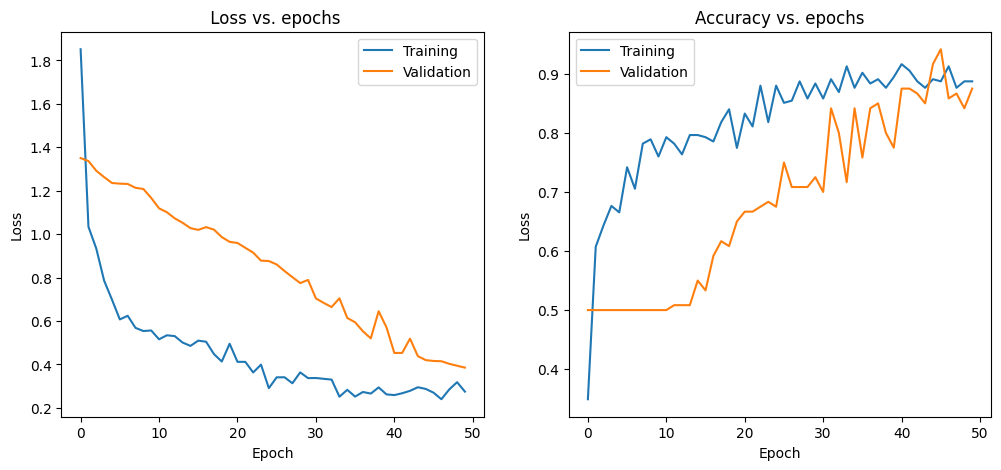

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
fig.add_subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [16]:
validation_data=val_ds
(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, batch_size=batch_size, verbose=1)

print("accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss)) 

4/4 [==============================] - 6s 108ms/step - loss: 0.3853 - accuracy: 0.8750
accuracy: 87.50%
Loss: 0.3852865397930145


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 100, 100, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 100, 100, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       6

In [22]:
from keras.utils.np_utils import to_categorical  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator()
test_ds = test_datagen.flow_from_directory(
test_path,
target_size=(img_height, img_width),
batch_size =1,class_mode ='categorical',
color_mode ="rgb",
shuffle=False,
seed =2021
)
test_labels = to_categorical(test_ds.classes, num_classes=num_classes) 


Found 120 images belonging to 4 classes.


In [24]:
test_ds.reset()
predictions = model.predict(test_ds, steps=len(test_ds.filenames), verbose=1)

120/120 [==============================] - 15s 124ms/step


In [41]:
import pandas as pd
predicted_class_indices=np.argmax(predictions,axis=1)
labels = (test_ds.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_labels = [labels[k] for k in predicted_class_indices]
filenames=test_ds.filenames
results={"actual":filenames, "Predictions":pred_labels}
df=pd.DataFrame(results)
df.head(120)

,actual,Predictions
0,Abdul/Abdul (1).jpg,Abdul
1,Abdul/Abdul (10).jpg,Abdul
2,Abdul/Abdul (11).jpg,Abdul
3,Abdul/Abdul (12).jpg,Abdul
4,Abdul/Abdul (13).jpg,Abdul
...,...,...
115,Dhanvi/Dhanvi (5).jpg,Alisha
116,Dhanvi/Dhanvi (6).jpg,Alisha
117,Dhanvi/Dhanvi (7).jpg,Alisha
118,Dhanvi/Dhanvi (8).jpg,Dhanvi


In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [27]:
preds = np.round(model.predict(val_ds),0)

4/4 [==============================] - 4s 58ms/step


In [ ]:
len(test_labels)


120

In [29]:
classification_metrics = metrics.classification_report(test_labels, preds)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(classification_metrics)


              precision    recall  f1-score   support

           0       0.32      0.33      0.33        30
           1       0.18      0.20      0.19        30
           2       0.14      0.13      0.14        30
           3       0.08      0.03      0.05        30

   micro avg       0.20      0.17      0.19       120
   macro avg       0.18      0.17      0.18       120
weighted avg       0.18      0.17      0.18       120
 samples avg       0.17      0.17      0.17       120



In [31]:
import pandas as pd


In [32]:
test_labels_tentative = pd.DataFrame(test_labels).idxmax(axis=1)
preds_tentative = pd.DataFrame(preds).idxmax(axis=1)

In [33]:
test_labels_tentative


0      0
1      0
2      0
3      0
4      0
      ..
115    3
116    3
117    3
118    3
119    3
Length: 120, dtype: int64

In [ ]:
len(test_labels_tentative), len(test_labels)



(120, 120)

In [34]:
len(preds_tentative), len(preds)



(120, 120)

In [35]:
confusion_matrix= confusion_matrix(test_labels_tentative, preds_tentative)


In [36]:
confusion_matrix

array([[14,  5,  6,  5],
       [12,  6, 11,  1],
       [10, 11,  4,  5],
       [10, 12,  7,  1]])

In [37]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
import itertools


Normalized confusion matrix


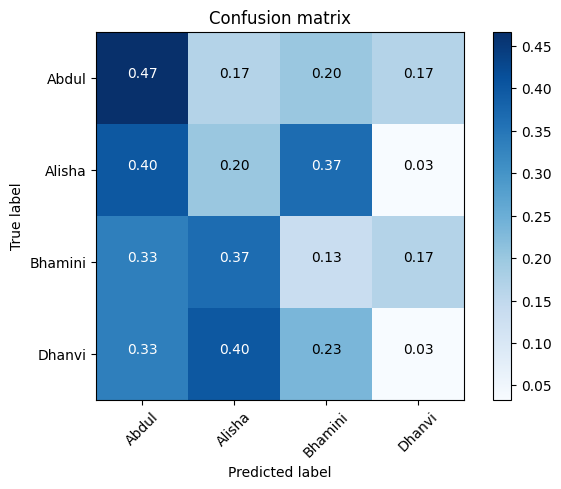

In [39]:
plot_confusion_matrix(confusion_matrix, 
                      ['Abdul', 'Alisha', 'Bhamini', 'Dhanvi'],
                     normalize=True)